In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
from coffea.util import load
import numpy as np
import pandas as pd
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from numba import njit
import vector
vector.register_numba()
vector.register_awkward()

from pprint import pprint 
hep.style.use(hep.style.ROOT)

import hist

In [18]:
!pwd

/work/dvalsecc/ttHbb/PocketCoffea/notebooks/JetTagging


In [30]:
file = "../../output/parton_matching_dR03_training_dataset_v27/output_ttHTobb_2018.coffea"
out = load(file)
out.keys()

dict_keys(['sum_genweights', 'sumw', 'cutflow', 'variables', 'columns', 'processing_metadata', 'scale_genweight'])

Number of events == "entries in the dataset" in each category

In [31]:
out["cutflow"]

{'initial': {'ttHTobb': 9668000},
 'skim': {'ttHTobb': 1607845},
 'presel': {'ttHTobb': 777068},
 'baseline': {'ttHTobb': 777068},
 'semilep_LHE': {'ttHTobb': 584143}}

Number of predicted physics events (weighted) during the datataking period

In [22]:
out["sumw"] 

{'baseline': {'ttHTobb': 1552.8997767889737},
 'semilep_LHE': {'ttHTobb': 1154.4067646531087}}

# Look at the variables
Histogram lib: https://github.com/scikit-hep/hist

In [15]:
out["variables"].keys()

dict_keys(['JetGood_eta', 'JetGood_pt', 'JetGood_phi', 'JetGood_btagDeepFlavB', 'BJetGood_eta', 'BJetGood_pt', 'BJetGood_phi', 'BJetGood_btagDeepFlavB', 'ElectronGood_eta', 'ElectronGood_pt', 'ElectronGood_phi', 'ElectronGood_etaSC', 'MuonGood_eta', 'MuonGood_pt', 'MuonGood_phi', 'nJets', 'nBJets', 'JetGood_eta_1', 'JetGood_pt_1', 'JetGood_phi_1', 'JetGood_btagDeepFlavB_1', 'JetGood_eta_2', 'JetGood_pt_2', 'JetGood_phi_2', 'JetGood_btagDeepFlavB_2', 'JetGood_eta_3', 'JetGood_pt_3', 'JetGood_phi_3', 'JetGood_btagDeepFlavB_3', 'JetGood_eta_4', 'JetGood_pt_4', 'JetGood_phi_4', 'JetGood_btagDeepFlavB_4', 'JetGood_eta_5', 'JetGood_pt_5', 'JetGood_phi_5', 'JetGood_btagDeepFlavB_5', 'bjet_eta_1', 'bjet_pt_1', 'bjet_phi_1', 'bjet_btagDeepFlavB_1', 'bjet_eta_2', 'bjet_pt_2', 'bjet_phi_2', 'bjet_btagDeepFlavB_2', 'bjet_eta_3', 'bjet_pt_3', 'bjet_phi_3', 'bjet_btagDeepFlavB_3', 'bjet_eta_4', 'bjet_pt_4', 'bjet_phi_4', 'bjet_btagDeepFlavB_4', 'bjet_eta_5', 'bjet_pt_5', 'bjet_phi_5', 'bjet_btagDeep

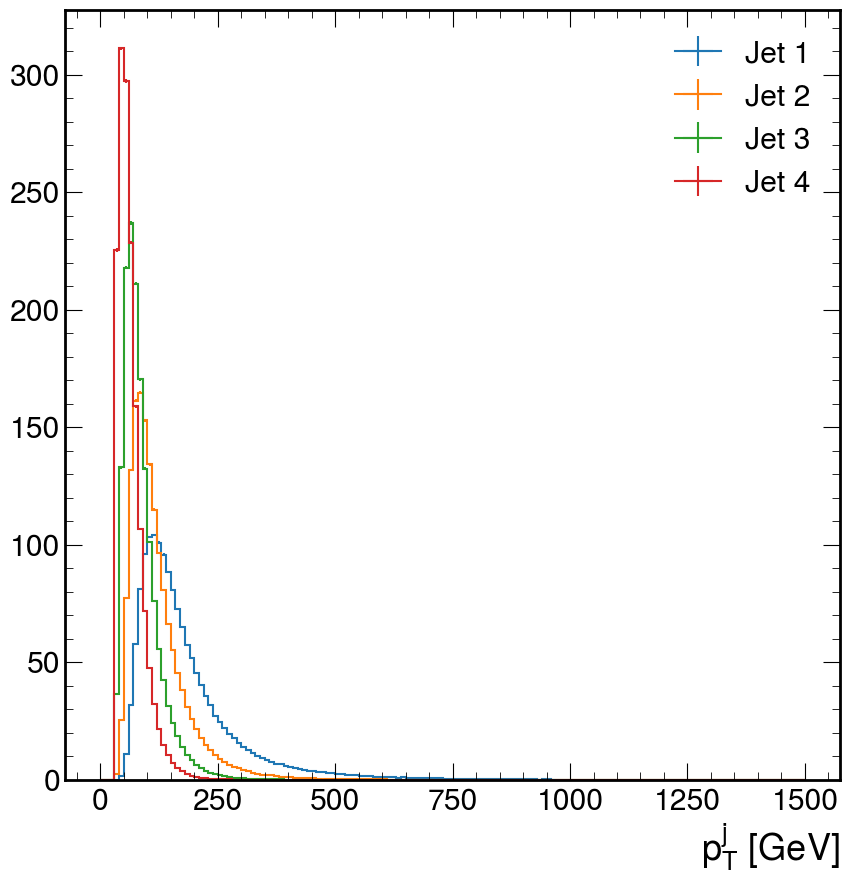

In [16]:
for i in range(1,5):
    h = out["variables"][f"JetGood_pt_{i}"]["ttHTobb"]
    hep.histplot(h[{"cat": "baseline", "year":"2018","variation":"nominal"}], label=f"Jet {i}")
plt.legend()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbc9416c880>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

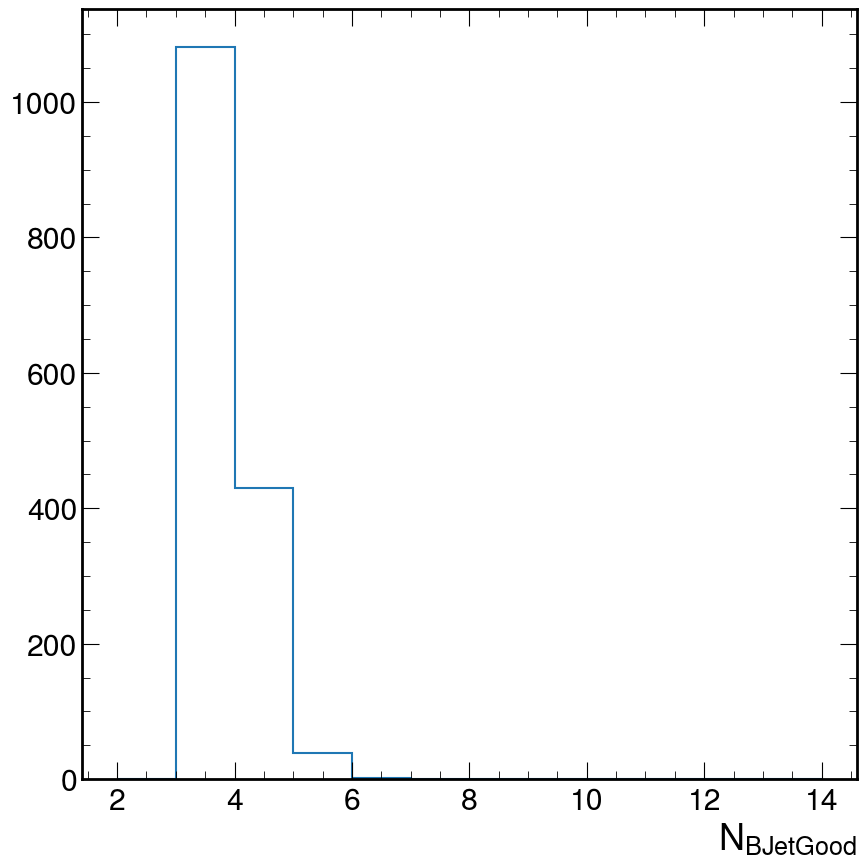

In [21]:
h = out["variables"][f"nBJets"]["ttHTobb"]
hep.histplot(h[{"cat": "baseline", "year":"2018","variation":"nominal"}], label=f"Jet {i}")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbc94298430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

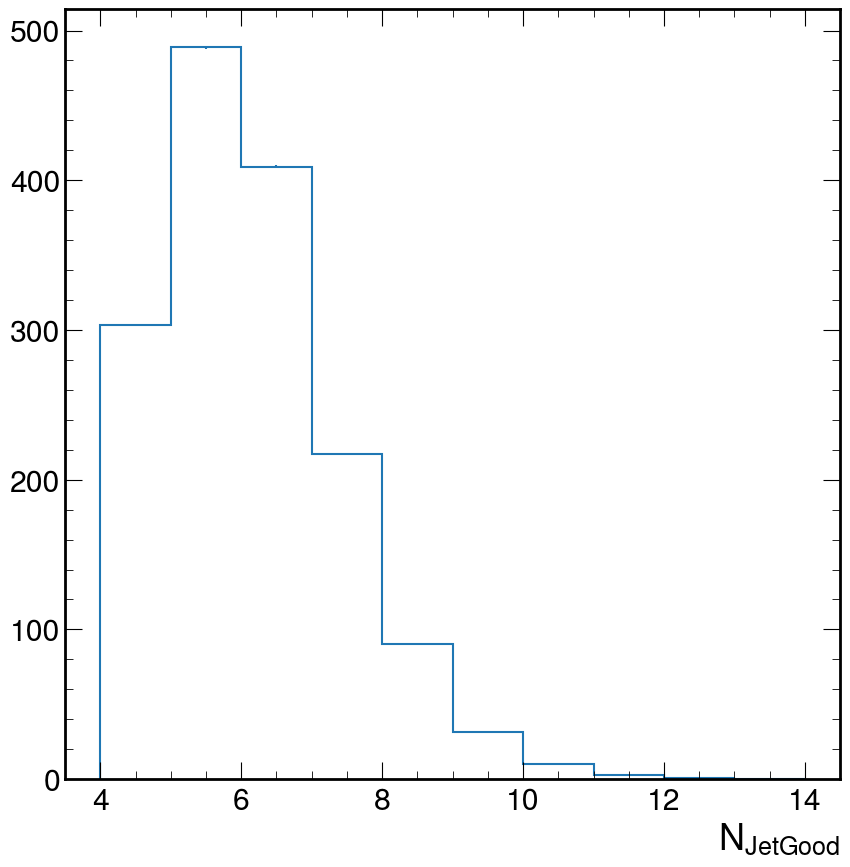

In [19]:
h = out["variables"][f"nJets"]["ttHTobb"]
hep.histplot(h[{"cat": "baseline", "year":"2018","variation":"nominal"}], label=f"Jet {i}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


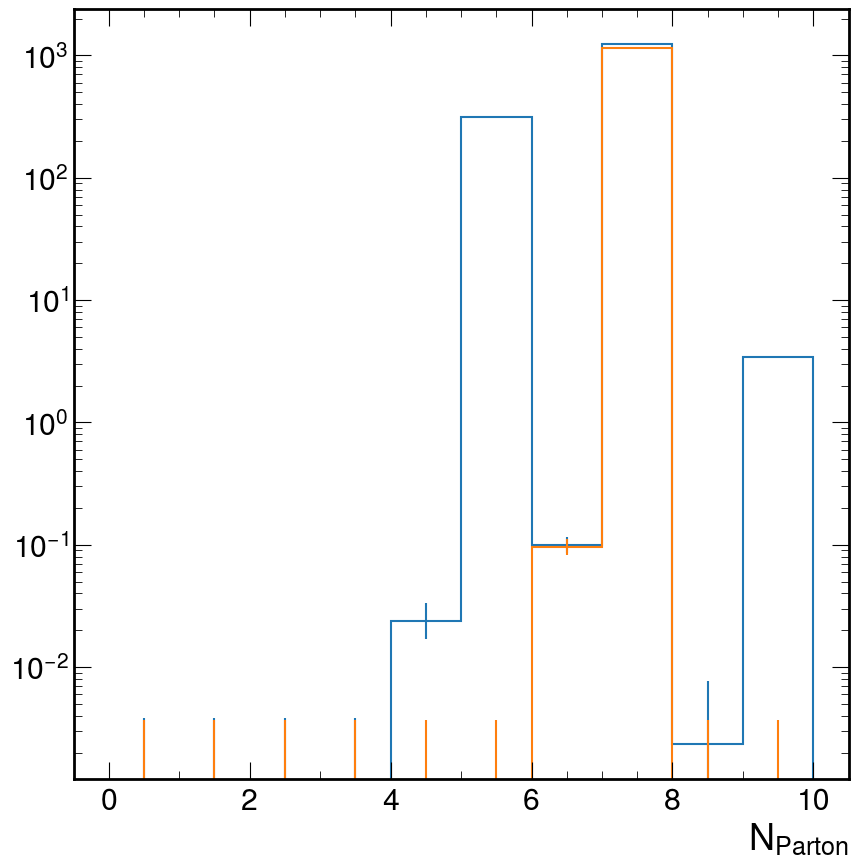

In [22]:
h = out["variables"][f"nPartons"]["ttHTobb"]
hep.histplot(h[{"cat": "baseline", "year":"2018","variation":"nominal"}])
hep.histplot(h[{"cat": "semilep_LHE", "year":"2018","variation":"nominal"}])
plt.legend()
plt.yscale("log")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


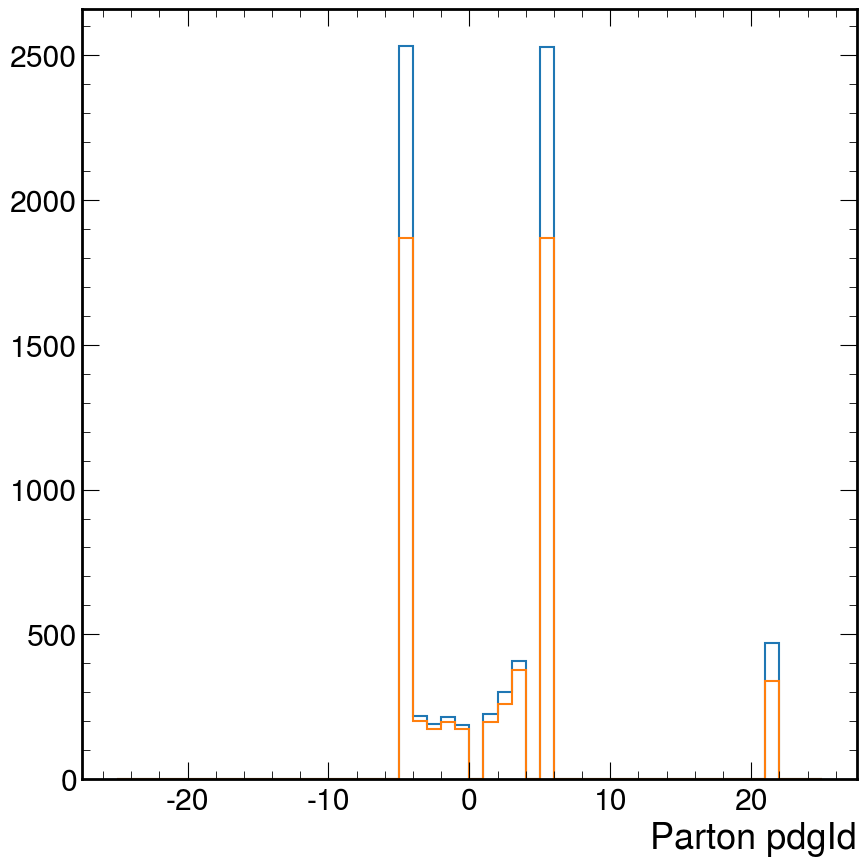

In [23]:
h = out["variables"][f"PartonMatched_pdgId"]["ttHTobb"]
hep.histplot(h[{"cat": "baseline", "year":"2018","variation":"nominal"}])
hep.histplot(h[{"cat": "semilep_LHE", "year":"2018","variation":"nominal"}])
plt.legend()

# Look at the event by event dataset

In [23]:
cols = out["columns"]
cols

{'ttHTobb': {'baseline': {},
  'semilep_LHE': {'Parton_N': column_accumulator(array([7, 7, 7, ..., 7, 7, 7])),
   'Parton_pt': column_accumulator(array([ 30.55859375,  73.28515625,  78.609375  , ...,  25.39550781,
          146.        ,  39.125     ])),
   'Parton_eta': column_accumulator(array([ 0.03071022,  1.50427246,  0.84420776, ..., -1.18499756,
           0.24023438,  0.40820312])),
   'Parton_phi': column_accumulator(array([ 0.3868103 , -0.48553467,  2.06066895, ..., -2.89904785,
          -2.2890625 ,  2.078125  ])),
   'Parton_pdgId': column_accumulator(array([ 2.,  5., -5., ...,  2.,  5., -5.])),
   'Parton_provenance': column_accumulator(array([4., 3., 2., ..., 5., 1., 1.])),
   'PartonMatched_N': column_accumulator(array([5, 6, 4, ..., 5, 6, 5])),
   'PartonMatched_pt': column_accumulator(array([  78.609375  ,   73.28515625, -999.        , ...,  128.984375  ,
            58.27539062, -999.        ])),
   'PartonMatched_eta': column_accumulator(array([ 8.44207764e-01,  1.5

In [10]:
C = cols['ttHTobb']["semilep_LHE"]

In [15]:
C["LeptonGood_eta"].value

array([ 1.6652832 ,  1.1428223 , -1.0939941 , ...,  0.46392822,
       -0.47827148, -1.3232422 ], dtype=float32)

In [25]:
cols['ttHTobb']["semilep_LHE"]["Parton_N"]

column_accumulator(array([7, 7, 7, ..., 7, 7, 7]))

### Recreate the awkward array

We have all the columns for partons, matched_partons and jets --> we can recollect them in a single Awkward array representing
partons, matched_partons and jets.  
We do so by `ak.zip` and then we can un-flatten the array, since we have also saved the number of object in each event. 
N.B.: Remember that the `matched_partons`  collections is ordered as the jet one. 

### Provenance
- 1 = jets from the higgs
- 2 = jets from the hadronically decaying top (1 b and 2 quarks)
- 3 = jet from the leptonically decaying top (1b)
- 4 = additiona radiation (gluon or quark)

In [32]:
cs = out["columns"]['ttHTobb']["semilep_LHE"]

partons = ak.unflatten(ak.zip({"pt": cs["Parton_pt"].value,
                              "eta": cs["Parton_eta"].value,
                              "phi": cs["Parton_phi"].value,
                              "pdgId": cs["Parton_pdgId"].value, 
                              "prov": cs["Parton_provenance"].value},
                         with_name='Momentum4D'),
                     cs["Parton_N"].value)

partons_matched = ak.unflatten(ak.zip({"pt": cs["PartonMatched_pt"].value,
                              "eta": cs["PartonMatched_eta"].value,
                              "phi": cs["PartonMatched_phi"].value,
                              "pdgId": cs["PartonMatched_pdgId"].value, 
                              "prov": cs["PartonMatched_provenance"].value},
                         with_name='Momentum4D'),
                     cs["PartonMatched_N"].value)

jets = ak.unflatten(ak.zip({"pt": cs["JetGood_pt"].value,
                              "eta": cs["JetGood_eta"].value,
                              "phi": cs["JetGood_phi"].value,
                              "btag": cs["JetGood_btagDeepFlavB"].value,
                              "m": np.zeros(cs["JetGood_btagDeepFlavB"].value.shape)},
                         with_name='Momentum4D'),
                     cs["JetGood_N"].value)

jets_matched = ak.unflatten(ak.zip({"pt": cs["JetGoodMatched_pt"].value,
                              "eta": cs["JetGoodMatched_eta"].value,
                              "phi": cs["JetGoodMatched_phi"].value,
                              "btag": cs["JetGoodMatched_btagDeepFlavB"].value,
                              "prov": cs["PartonMatched_provenance"].value,
                              "m": np.zeros(cs["PartonMatched_provenance"].value.shape)},
                         with_name='Momentum4D'),
                     cs["JetGoodMatched_N"].value)

Masking again the missing matched partons replacing -999 with None for awkward utils

In [33]:
jets_matched = ak.mask(jets_matched, jets_matched.pt==-999, None)
partons_matched = ak.mask(partons_matched, partons_matched.pt==-999, None)
is_jet_matched = ~ak.is_none(jets_matched, axis=1)
jets = ak.with_field(jets, is_jet_matched, "matched")

# Filling with -1 the not matched provenance
jets = ak.with_field(jets, ak.fill_none(jets_matched.prov, -1), "prov")

### Saving raw collection to disk

In [48]:
partons_matched[3].tolist()

[{'pt': 402.296875,
  'eta': 1.5523681640625,
  'phi': -0.551361083984375,
  'pdgId': 21.0,
  'prov': 4.0},
 {'pt': 101.1015625,
  'eta': 1.162109375,
  'phi': 1.5809326171875,
  'pdgId': 5.0,
  'prov': 2.0},
 {'pt': 54.375,
  'eta': 0.568359375,
  'phi': 2.5390625,
  'pdgId': 5.0,
  'prov': 1.0},
 None,
 {'pt': 49.78125,
  'eta': 0.484375,
  'phi': -2.80517578125,
  'pdgId': -5.0,
  'prov': 3.0},
 {'pt': 68.5,
  'eta': 1.12109375,
  'phi': -0.21533203125,
  'pdgId': -5.0,
  'prov': 1.0},
 None]

In [50]:
df = ak.zip({"jets": jets,
       "partons_matched": partons_matched},depth_limit=1)
ak.to_parquet(df, "all_jets_v2.parquet")

# Permutation of jets 

In [8]:
from pocket_coffea.parameters.btag import btag

(array([4.00401e+05, 1.67916e+05, 1.49850e+04, 7.99000e+02, 4.10000e+01,
        1.00000e+00]),
 array([3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 6 artists>)

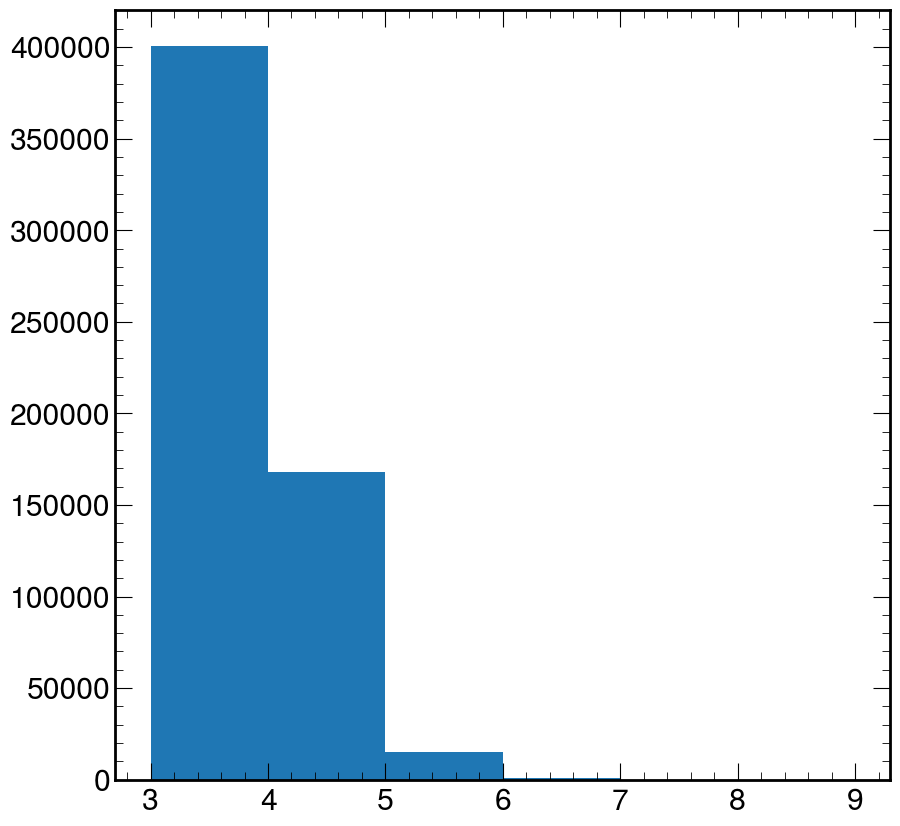

In [81]:
plt.hist(ak.sum(jets.btag > btag["2018"]["btagging_WP"], axis=1), range=(3, 9), bins=6)

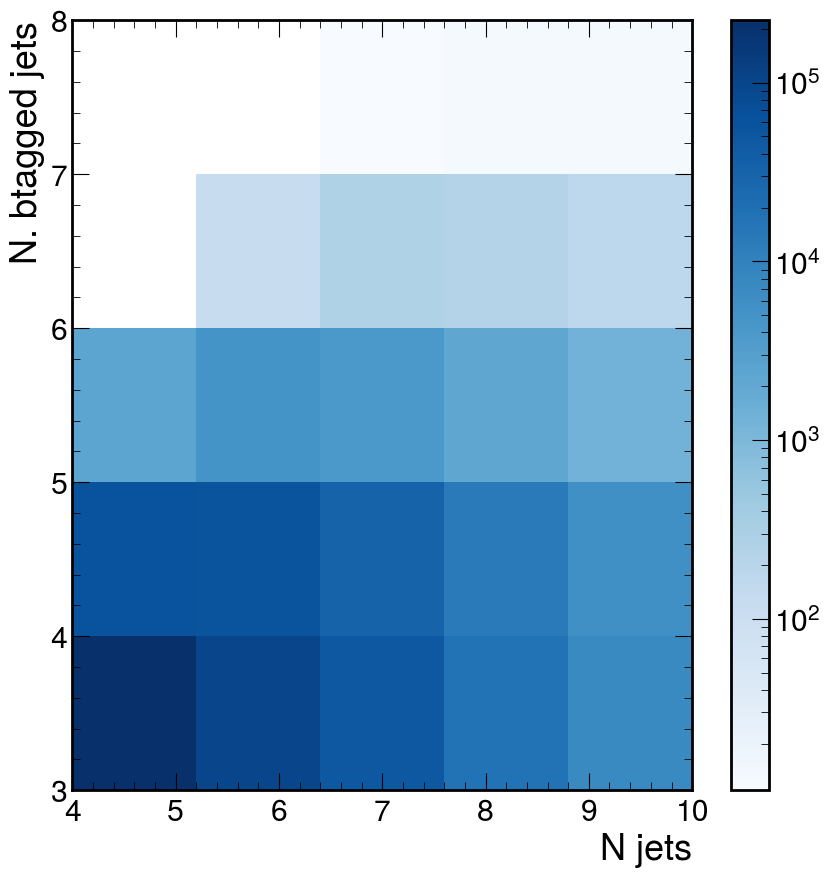

In [91]:
plt.hist2d(ak.to_numpy(ak.num(jets, axis=1)),
           ak.to_numpy(ak.sum(jets.btag > btag["2018"]["btagging_WP"], axis=1)),
           range=((4, 10), (3, 8)), bins=5, 
          cmap="Blues", norm=LogNorm())
plt.xlabel("N jets")
plt.ylabel("N. btagged jets")
plt.colorbar()

In [93]:
jets.prov[0:10].tolist()

[[2.0, 3.0, -1.0, 4.0, 2.0],
 [2.0, 1.0, 2.0, 3.0, 2.0, 1.0],
 [2.0, 1.0, 3.0, 2.0],
 [4.0, 2.0, 1.0, -1.0, 3.0, 1.0, -1.0],
 [3.0, 2.0, 2.0, 1.0],
 [3.0, 1.0, 2.0, 2.0, 2.0],
 [2.0, 3.0, 2.0, -1.0],
 [1.0, 3.0, 2.0, 2.0, 1.0, 4.0],
 [2.0, 1.0, 3.0, 1.0, -1.0, 2.0],
 [2.0, 2.0, 2.0, -1.0, 4.0, -1.0, 1.0, 3.0]]

### Getting fully matched events

In [9]:
N_jets_2h = ak.sum(jets.prov == 1, axis=1)
N_jets_th = ak.sum(jets.prov == 2, axis=1)
N_jets_tl = ak.sum(jets.prov == 3, axis=1)
mask_full_match = (N_jets_2h ==2)& (N_jets_th==3) & (N_jets_tl==1)
jets_fullymatched = jets[mask_full_match]
Njets_fullymatched = ak.num(jets_fullymatched, axis=1)

In [10]:
len(jets_fullymatched) / len(jets)

0.11619757490888362

Text(1, 0, 'N. jets fully matched events')

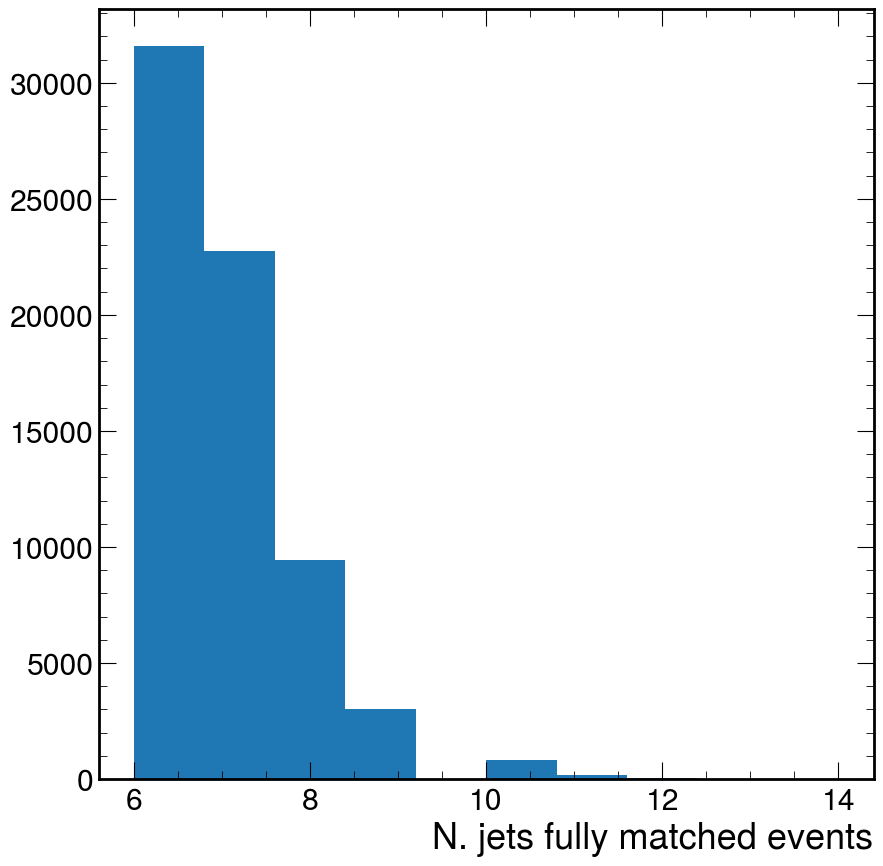

In [11]:
plt.hist(Njets_fullymatched)
plt.xlabel("N. jets fully matched events")

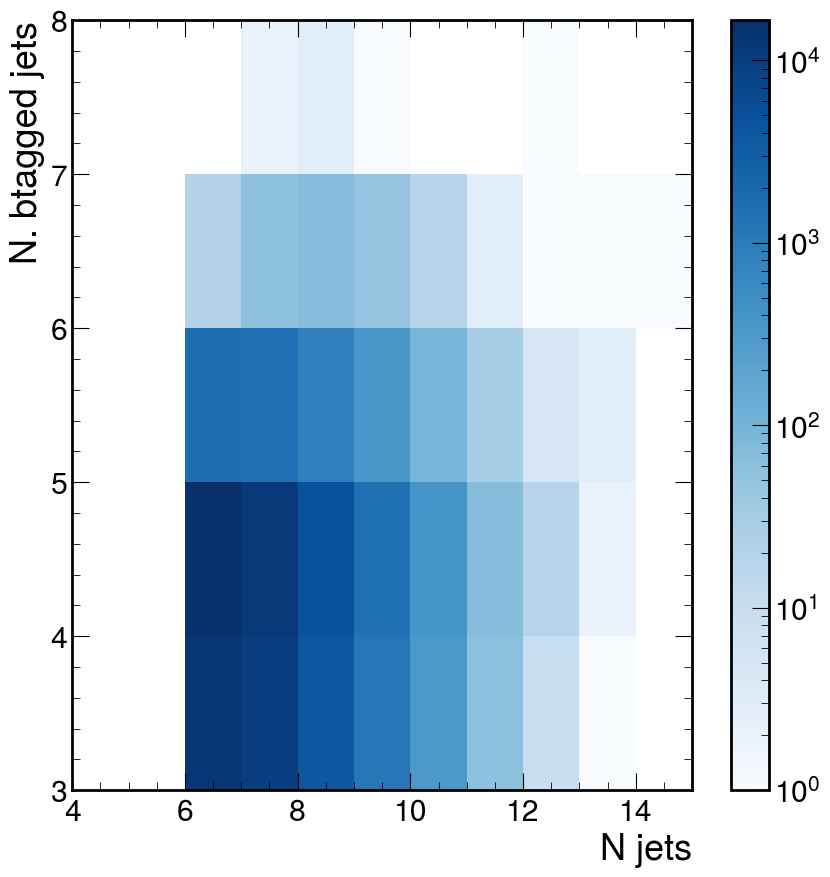

In [11]:
plt.hist2d(ak.to_numpy(ak.num(jets_fullymatched, axis=1)),
           ak.to_numpy(ak.sum(jets_fullymatched.btag > btag["2018"]["btagging_WP"], axis=1)),
           range=((4, 15), (3, 8)), bins=(11, 5), 
          cmap="Blues", norm=LogNorm())
plt.xlabel("N jets")
plt.ylabel("N. btagged jets")
plt.colorbar()

In [116]:
higgs_jets = jets_fullymatched[jets_fullymatched.prov==1]
toph_jets = jets_fullymatched[jets_fullymatched.prov==2]

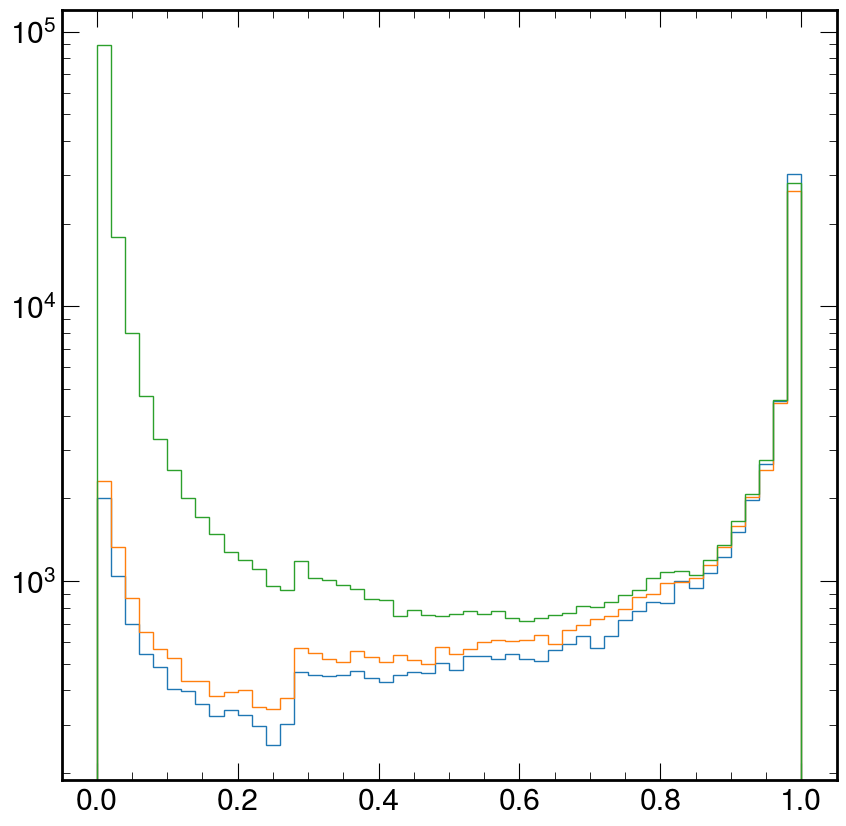

In [119]:
plt.hist(higgs_jets[:,0].btag, bins=50, histtype="step", range=(0,1))
plt.hist(higgs_jets[:,1].btag, bins=50, histtype="step", range=(0,1))
plt.hist(ak.flatten(toph_jets.btag), bins=50, histtype="step", range=(0,1))
plt.yscale("log")


# Sort the jets by btag

In [12]:
btag_order = ak.argsort(jets_fullymatched.btag, ascending=False)
higher_btag_idx = btag_order[:,0:4]
higher_btag_idx[0:4].tolist()

[[3, 5, 1, 4], [4, 3, 2, 5], [1, 3, 4, 0], [4, 0, 3, 2]]

### Create combinations

We need to do combinations, not permutations

https://stackoverflow.com/questions/61262188/numba-safe-version-of-itertools-combinations

In [13]:
##https://github.com/numba/numba/issues/3599

@njit()
def permutations(A, k):
    r = [[i for i in range(0)]]
    for i in range(k):
        r = [[a] + b for a in A for b in r if (a in b)==False]
    return r


In [14]:
@njit
def filter_permutations(indices, A):
    out = [ ]
    remove = []
    for i in range(len(indices)-1):
        for j in range(i+1, len(indices)):
            remove.append((indices[j],indices[i]))

    for p in A:
        good = True
        for j,i in remove:
            if p[0]==j and p[1]==i:
                good = False
                break
        if good:
            out.append(p)
    return out
    

In [15]:
from numba.typed import List
def get_permutations(njets, btagged_indices, builder):
    for N, btag in zip(njets, btagged_indices):
        builder.begin_list()
        non_btag = []
        for i in range(N):
            if i not in btag:
                non_btag.append(i)
        # Now we can build the permutations
        bbbb = permutations(List(btag), 4)
        qq = permutations(List(non_btag), 2)
        
        for Blist in bbbb:
            for Qlist in qq:
                builder.begin_list()
                for b in Blist: 
                    builder.append(b)
                for q in Qlist:
                    builder.append(q)
                builder.end_list()
    
        builder.end_list()
    return builder

@njit
def get_permutations_numba_less(njets, btagged_indices, builder):
    for N, btag in zip(njets, btagged_indices):
        builder.begin_list()
        non_btag = []
        for i in range(N):
            if i not in btag:
                non_btag.append(i)
        # Now we can build the permutations
        # and removing the cases where the first two elements are just inverted
        bbbb = filter_permutations(btag, permutations(btag, 4))
        qq = filter_permutations(non_btag, permutations(non_btag, 2))
        
        for Blist in bbbb:
            for Qlist in qq:
                builder.begin_list()
                for b in Blist: 
                    builder.append(b)
                for q in Qlist:
                    builder.append(q)
                builder.end_list()
    
        builder.end_list()
    return builder


@njit
def get_permutations_numba_all(njets, btagged_indices, builder):
    for N, btag in zip(njets, btagged_indices):
        builder.begin_list()
        non_btag = []
        for i in range(N):
            if i not in btag:
                non_btag.append(i)
        # Now we can build the permutations
        bbbb = permutations(btag, 4)
        qq = permutations(non_btag, 2)
        
        for Blist in bbbb:
            for Qlist in qq:
                builder.begin_list()
                for b in Blist: 
                    builder.append(b)
                for q in Qlist:
                    builder.append(q)
                builder.end_list()
    
        builder.end_list()
    return builder

In [18]:
%%time
get_permutations(Njets_fullymatched[0:10000], higher_btag_idx[0:10000], ak.ArrayBuilder())

CPU times: user 10.3 s, sys: 23.2 ms, total: 10.4 s
Wall time: 10.4 s


<ArrayBuilder [[[4, 2, 3, 1, 0, ... 7, 6, 1, 5, 3]]] type='10000 * var * var * i...'>

In [82]:
%%timeit
get_permutations_numba_all(Njets_fullymatched[0:10000], higher_btag_idx[0:10000], ak.ArrayBuilder())

760 ms ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
%%timeit
get_permutations_numba_less(Njets_fullymatched[0:10000], higher_btag_idx[0:10000], ak.ArrayBuilder())

463 ms ± 32.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Applying the function

In [106]:
comb_index_all = get_permutations_numba_all(Njets_fullymatched, higher_btag_idx, ak.ArrayBuilder()).snapshot()
comb_index_flat_all = ak.flatten(comb_index_all,1)

In [16]:
comb_index = get_permutations_numba_less(Njets_fullymatched, higher_btag_idx, ak.ArrayBuilder()).snapshot()
comb_index_flat = ak.flatten(comb_index,1)

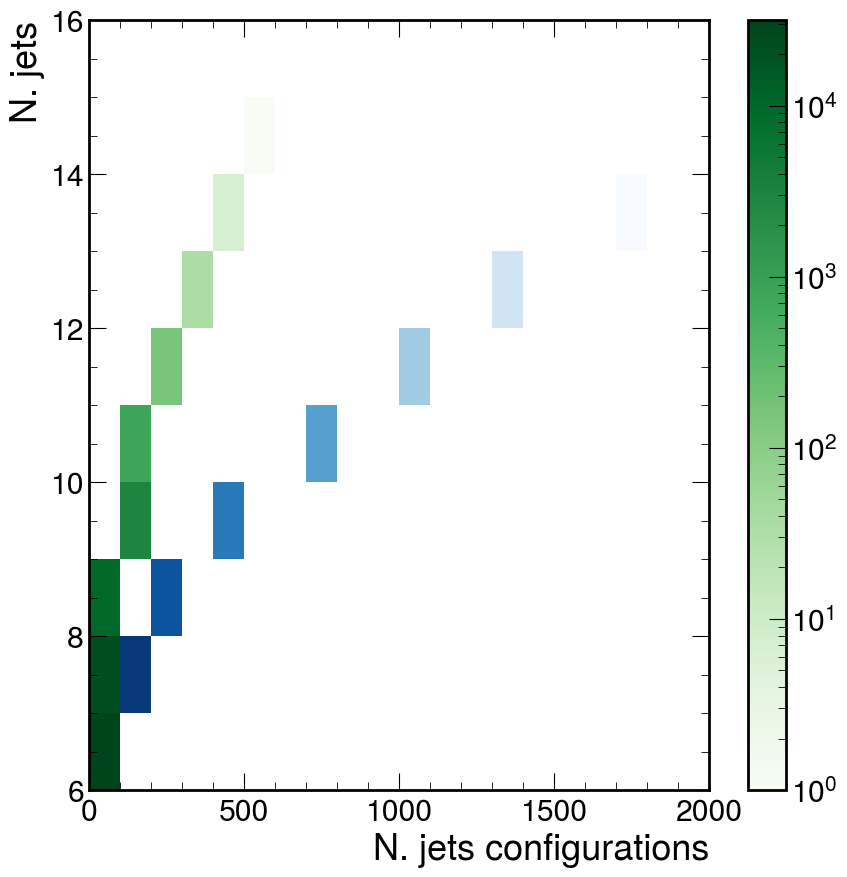

In [108]:
plt.hist2d(ak.to_numpy(ak.num(comb_index_all, axis=1)),
           ak.to_numpy(Njets_fullymatched), bins=(20, 10), range=((0, 2000), (6, 16)), norm=LogNorm(), cmap="Blues")
plt.hist2d(ak.to_numpy(ak.num(comb_index, axis=1)),
           ak.to_numpy(Njets_fullymatched), bins=(20, 10), range=((0, 2000), (6, 16)), norm=LogNorm(), cmap="Greens")
plt.ylabel("N. jets")
plt.xlabel("N. jets configurations")
plt.colorbar()

In [21]:
@njit
def get_jets_combinations(jets, provenance, btags, indices, builder):
    for J, prov, btag, ind_list in zip(jets, provenance, btags, indices):
        builder.begin_list()
        for ix in ind_list:
            # multiple combinations for each event
            builder.begin_list()
            for i in ix:
                builder.begin_record()
                jet = J[i]
                builder.field("pt").append(jet.pt)
                builder.field("eta").append(jet.eta)
                builder.field("phi").append(jet.phi)
                builder.field("mass").append(jet.mass)
                builder.field("prov").append(prov[i])
                builder.field("btag").append(btag[i])
                builder.end_record()
            builder.end_list()
        builder.end_list()
    return builder

In [22]:
%%time
get_jets_combinations(jets_fullymatched[0:10],jets_fullymatched.prov[0:10], jets_fullymatched.btag[0:10], comb_index[0:10], ak.ArrayBuilder())

CPU times: user 706 ms, sys: 5.87 ms, total: 712 ms
Wall time: 710 ms


<ArrayBuilder [[[{pt: 102, ... btag: 0.00616}]]] type='10 * var * var * {"pt": f...'>

In [23]:
jets_combinations = ak.with_name(get_jets_combinations(
        jets_fullymatched,
        jets_fullymatched.prov, 
        jets_fullymatched.btag, 
        comb_index, 
        ak.ArrayBuilder()).snapshot(), name="Momentum4D")

In [24]:
#Identifying the slot as specific particles
higgs_jets = jets_combinations[:,:,0:2]
tlep_jets = jets_combinations[:,:,2:3]
thad_jets = jets_combinations[:,:,3:]
whad_jets = jets_combinations[:,:,4:6]

In [113]:
# Look for the correct combination

In [25]:
prov_comb = jets_combinations.prov

In [26]:
prov_comb[0].tolist()

[[3.0, 1.0, 1.0, 2.0, 2.0, 2.0],
 [3.0, 1.0, 2.0, 1.0, 2.0, 2.0],
 [3.0, 1.0, 1.0, 2.0, 2.0, 2.0],
 [3.0, 1.0, 2.0, 1.0, 2.0, 2.0],
 [3.0, 2.0, 1.0, 1.0, 2.0, 2.0],
 [3.0, 2.0, 1.0, 1.0, 2.0, 2.0],
 [1.0, 1.0, 3.0, 2.0, 2.0, 2.0],
 [1.0, 1.0, 2.0, 3.0, 2.0, 2.0],
 [1.0, 2.0, 3.0, 1.0, 2.0, 2.0],
 [1.0, 2.0, 1.0, 3.0, 2.0, 2.0],
 [1.0, 2.0, 3.0, 1.0, 2.0, 2.0],
 [1.0, 2.0, 1.0, 3.0, 2.0, 2.0]]

In [27]:
signal_comb = (prov_comb[:,:,0] == 1) & (prov_comb[:,:,1] == 1) & (prov_comb[:,:,2] == 2) &\
(prov_comb[:,:,3] == 3) & (prov_comb[:,:,4] == 2)  & (prov_comb[:,:,5] == 2)

In [28]:
assert ak.sum(ak.num( jets_combinations[signal_comb], axis=1) > 1)==0  # Check that we have

In [29]:
N_events_with_correct_comb = ak.sum(ak.sum(signal_comb, axis=1)>0)
N_events_with_correct_comb / len(jets_fullymatched)

0.7875390417820732

(array([14421.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 53455.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

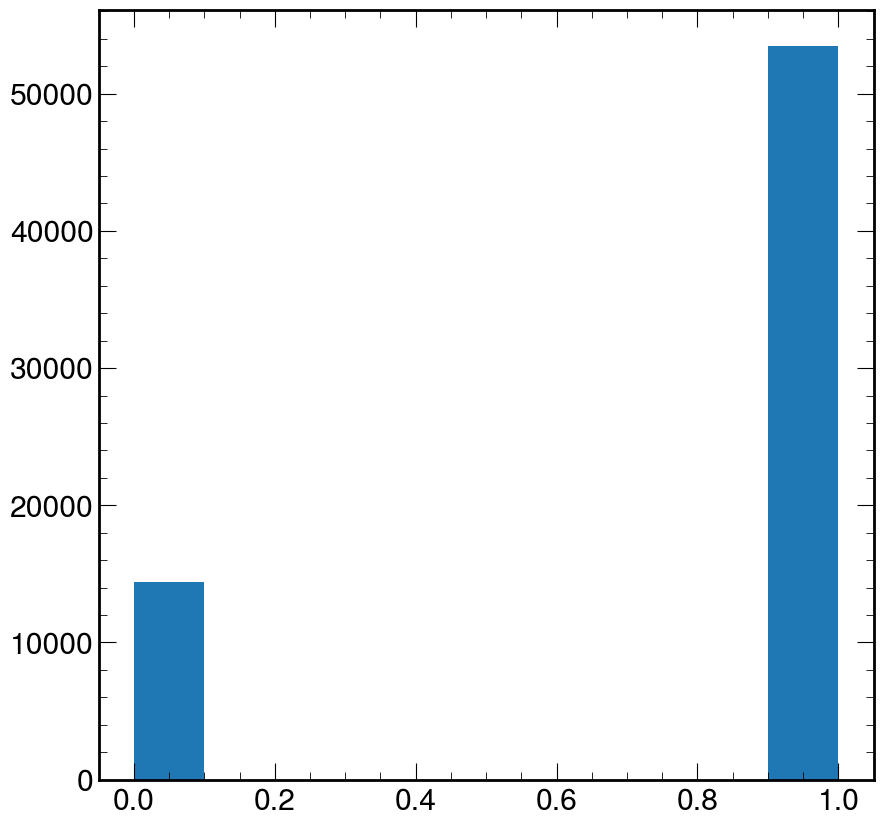

In [30]:
plt.hist(ak.sum(signal_comb, axis=1))

In [33]:
whad = whad_jets[:,:,0]+whad_jets[:,:,1]

(0.0, 0.04)

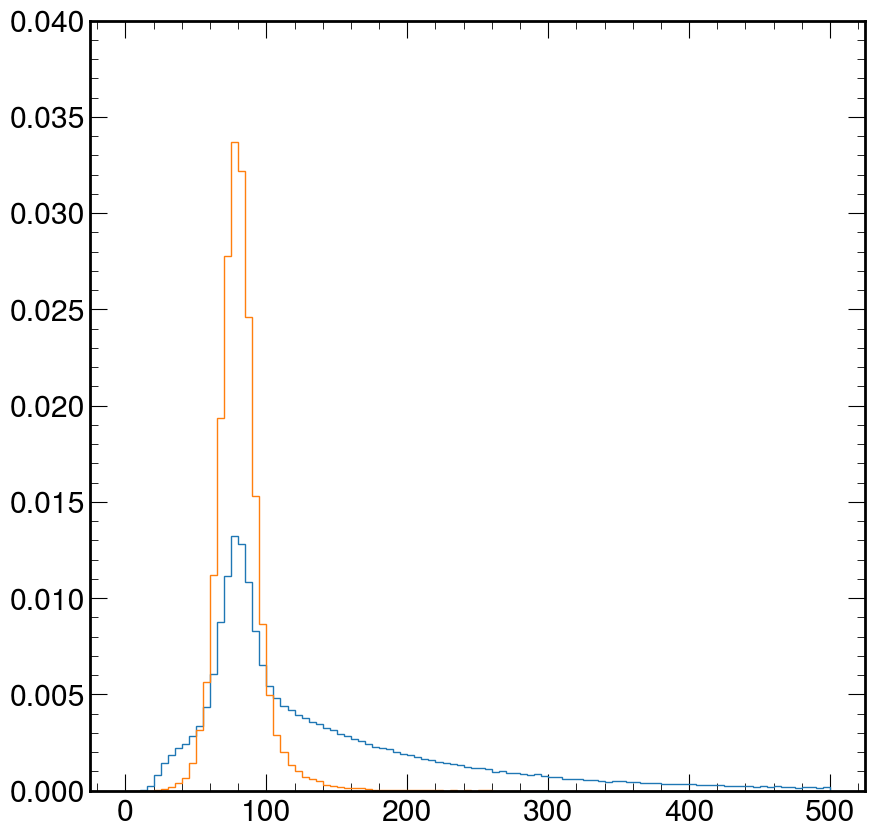

In [34]:
plt.hist(ak.flatten(whad[~signal_comb].mass), bins=100, range=(0,500), histtype="step", density=True)
plt.hist(ak.flatten(whad[signal_comb].mass), bins=100, range=(0,500),histtype="step",density=True)
plt.ylim(0,0.04)

## Saving the collections to parquet

In [35]:
df = ak.zip({"jets_fullymatched": jets_fullymatched,
       "comb_index": comb_index,
       "signal_comb": signal_comb,
       "jets_combinations":jets_combinations,
       "higgs_jets": higgs_jets,
       "tlep_jets": tlep_jets,
       "thad_jets": thad_jets,
       "whad_jets": whad_jets}, depth_limit=1)

In [36]:
ak.to_parquet(df, "jets_combinations_ttHbb_fullymatched_v2.parquet")

In [158]:
!ls

jets_combinations_ttHbb_fullymatched_v1.parquet  JetTagging_initial_debug.ipynb
JetTagging_dataset.ipynb			 plots


In [166]:
!ls -lrth

total 100M
drwxr-xr-x 3 dvalsecc ethz-higgs   13 Oct  6 10:15 plots
-rw-r--r-- 1 dvalsecc ethz-higgs 270K Nov 21 16:41 JetTagging_initial_debug.ipynb
-rw-r--r-- 1 dvalsecc ethz-higgs 507K Nov 23 14:24 JetTagging_dataset.ipynb
-rw-r--r-- 1 dvalsecc ethz-higgs 121M Nov 23 14:26 jets_combinations_ttHbb_fullymatched_v1.parquet


In [ ]:
!wget http://mlphysics.ics.uci.edu/data/2021_ttbar/ttbar_testing.h5

--2023-02-02 09:14:30--  http://mlphysics.ics.uci.edu/data/2021_ttbar/ttbar_testing.h5
Resolving mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)... 128.195.1.86
Connecting to mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165125400 (157M)
Saving to: ‘ttbar_testing.h5’

98% [=====================================> ] 163,417,625 1.77MB/s  eta 1s     